In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn. model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn import metrics
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


In [4]:
# Генерируем датасет
df, df_1 = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=3.8, center_box = (-6.0, 6.0), random_state = 42)
df = pd.DataFrame(df)
df['class'] = df_1
df = df.rename(columns={0:'first',1:'second'})

In [5]:
df.head()

,first,second,class
0,1.670111,1.115686,0
1,9.159190,-0.919734,1
2,-1.381918,-4.288292,1
3,4.770702,-0.996158,1
4,2.098104,13.317711,1


<Axes: xlabel='first', ylabel='second'>

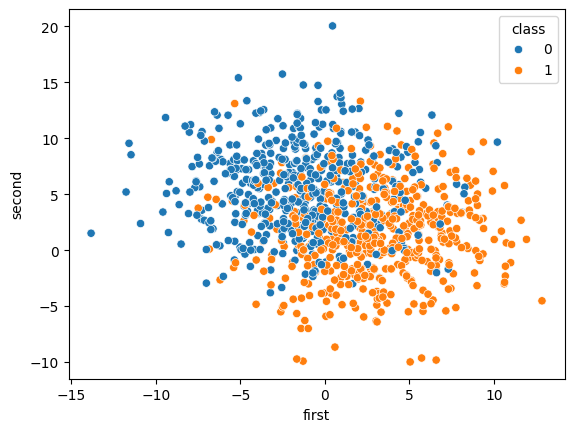

In [6]:
# Визуализируем распределение классов по признакам
sns.scatterplot(data=df, x='first', y='second', hue='class')

In [10]:
# Стандартизация признаков

In [401]:
scaler = StandardScaler()
print(scaler.fit(df[['first','second']]))
print(scaler.mean_)
scaled_data = pd.DataFrame(scaler.transform(df[['first','second']]))

StandardScaler()
[0.75538611 3.50578737]


In [403]:
scaled_data['class'] = df['class']
scaled_data = scaled_data.rename(columns={0:'first',1:'second'})

In [405]:
# Разделение на выборки

In [407]:
X = scaled_data[['first', 'second']]
y = scaled_data['class']
X_train,X_test,y_train,y_test = train_test_split (X,y,test_size=0.3,random_state=0) 

In [409]:
# Логистическая регрессия

In [411]:
log_regression = LogisticRegression()
log_regression. fit (X_train, y_train)
y_pred = log_regression. predict (X_test)

In [413]:
metrics.accuracy_score(y_test, y_pred)

0.8

In [415]:
# Машина опорных векторов

In [416]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [419]:
y_pred = clf.predict(X_test)

In [421]:
metrics.accuracy_score(y_test, y_pred)

0.7866666666666666

In [423]:
# Дерево решений

In [425]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [427]:
y_pred = clf.predict(X_test)

In [429]:
metrics.accuracy_score(y_test, y_pred)

0.74

In [431]:
# Случайный лес

In [433]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [435]:
y_pred = clf.predict(X_test)

In [437]:
metrics.accuracy_score(y_test, y_pred)

0.77

In [439]:
# Сеточный поиск наилучших гиперпараметров 

In [441]:
def gini(actual, pred):
    assert (len(actual) == len(pred))
    all = np.asarray(np.c_[actual, pred, np.arange(len(actual))], dtype=float)
    all = all[np.lexsort((all[:, 2], -1 * all[:, 1]))]
    totalLosses = all[:, 0].sum()
    giniSum = all[:, 0].cumsum().sum() / totalLosses

    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)


def gini_normalized(actual, pred):
    return gini(actual, pred) / gini(actual, actual)

In [443]:
gini_scorer = make_scorer(gini_normalized)

In [454]:
# Поиск для Логистической регрессии
log_reg_parameters = {'C':[0.1,1,10]}
log_reg_gs = GridSearchCV(estimator = log_regression,
                      param_grid = log_reg_parameters,
                     scoring = gini_scorer)
log_reg_gs.fit(X_train, y_train)
# pd.DataFrame(log_reg_gs.cv_results_) Можно вывести для получения всей таблицы поиска
y_pred = log_reg_gs.predict(X_test)
log_reg_gini = gini_normalized(y_test, y_pred)
print('Логистическая регрессия:\n', 'Лучшие гиперпараметры:', log_reg_gs.best_estimator_, '\nКоэффициент Джини: ', log_reg_gini, sep='')

Логистическая регрессия:
Лучшие гиперпараметры:LogisticRegression(C=0.1)
Коэффициент Джини: 0.6093304843304842


In [452]:
# Поиск для SVM
svm_parameters = {'C':[0.1,1,10], 'gamma':[0.01,0.1,1]}
svm_gs = GridSearchCV(estimator = svm.SVC(),
                      param_grid = svm_parameters,
                     scoring = gini_scorer)
svm_gs.fit(X_train, y_train)
# pd.DataFrame(svm_gs.cv_results_) Можно вывести для получения всей таблицы поиска
y_pred = svm_gs.predict(X_test)
svm_gini = gini_normalized(y_test, y_pred)
print('Машина опорных векторов:\n', 'Лучшие гиперпараметры:', svm_gs.best_estimator_, '\nКоэффициент Джини: ', svm_gini, sep='')

Машина опорных векторов:
Лучшие гиперпараметры:SVC(C=10, gamma=0.01)
Коэффициент Джини: 0.5758547008547007


In [456]:
# Поиск для дерева решений
tree_parameters = {'max_depth':[5,10,20],'min_samples_split':[2,5,10]}
tree_gs = GridSearchCV(estimator = tree.DecisionTreeClassifier(),
                      param_grid = tree_parameters,
                     scoring = gini_scorer)
tree_gs.fit(X_train, y_train)
# pd.DataFrame(tree_gs.cv_results_) Можно вывести для получения всей таблицы поиска
y_pred = tree_gs.predict(X_test)
tree_gini = gini_normalized(y_test, y_pred)
print('Дерево решений:\n', 'Лучшие гиперпараметры:', tree_gs.best_estimator_, '\nКоэффициент Джини: ', tree_gini, sep='')

Дерево решений:
Лучшие гиперпараметры:DecisionTreeClassifier(max_depth=5, min_samples_split=10)
Коэффициент Джини: 0.5132656695156695


In [470]:
# Поиск для случайного леса
rand_forest_parameters = {'n_estimators':[10,50,100],'max_depth':[5,10,20]}
rand_forest_gs = GridSearchCV(estimator = RandomForestClassifier(),
                      param_grid = rand_forest_parameters,
                     scoring = gini_scorer)
rand_forest_gs.fit(X_train, y_train)
# pd.DataFrame(rand_forest_gs.cv_results_) Можно вывести для получения всей таблицы поиска
y_pred = rand_forest_gs.predict(X_test)
rand_forest_gini = gini_normalized(y_test, y_pred)
print('Дерево решений:\n', 'Лучшие гиперпараметры: ', rand_forest_gs.best_estimator_, '\nКоэффициент Джини: ', rand_forest_gini, sep='')

Дерево решений:
Лучшие гиперпараметры: RandomForestClassifier(max_depth=5, n_estimators=50)
Коэффициент Джини: 0.5649038461538464
